In [1]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_excel('FilteredData.xlsx')

In [3]:
d = {'extended':df['extended'],'crit1':df['crit1'],'crit2':df['crit2'],'crit3':df['crit3'],'multiple':df['multiple'],'success':df['success'],'suicide':df['suicide'],'attacktype1':df['attacktype1'],'targtype1':df['targtype1'],'guncertain1':df['guncertain1'],'nperps':df['nperps'],'claimed':df['claimed'],'weaptype1':df['weaptype1'],'nkill':df['nkill'],'nkillter':df['nkillter'],'nwound':df['nwound'],'nwoundte':df['nwoundte'],'property':df['property'],'ishostkid':df['ishostkid'], 'doubtterr':df['doubtterr']}

In [4]:
df = pd.DataFrame(d)
df.head()

,extended,crit1,crit2,crit3,multiple,success,suicide,attacktype1,targtype1,guncertain1,nperps,claimed,weaptype1,nkill,nkillter,nwound,nwoundte,property,ishostkid,doubtterr
0,0,1,1,1,0,1,0,7,4,0,1,1,8,0,0,0,0,1,0,0
1,0,1,1,1,0,1,0,7,2,0,1,0,8,0,0,0,0,1,0,0
2,0,1,1,1,0,1,0,3,8,1,3,0,6,0,0,0,0,1,0,0
3,0,1,1,1,0,0,0,3,4,0,2,0,6,0,0,0,0,0,0,0
4,0,1,1,1,0,1,0,7,2,0,1,0,8,0,0,0,0,1,0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18214 entries, 0 to 18213
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   extended     18214 non-null  int64
 1   crit1        18214 non-null  int64
 2   crit2        18214 non-null  int64
 3   crit3        18214 non-null  int64
 4   multiple     18214 non-null  int64
 5   success      18214 non-null  int64
 6   suicide      18214 non-null  int64
 7   attacktype1  18214 non-null  int64
 8   targtype1    18214 non-null  int64
 9   guncertain1  18214 non-null  int64
 10  nperps       18214 non-null  int64
 11  claimed      18214 non-null  int64
 12  weaptype1    18214 non-null  int64
 13  nkill        18214 non-null  int64
 14  nkillter     18214 non-null  int64
 15  nwound       18214 non-null  int64
 16  nwoundte     18214 non-null  int64
 17  property     18214 non-null  int64
 18  ishostkid    18214 non-null  int64
 19  doubtterr    18214 non-null  int64
dtypes: int

## Changing categorical variables to object datatype

In [6]:
df[["extended","crit1","crit2","crit3","multiple","success","suicide","attacktype1","targtype1","guncertain1","claimed","weaptype1","property","ishostkid","doubtterr"]] = df[["extended","crit1","crit2","crit3","multiple","success","suicide","attacktype1","targtype1","guncertain1","claimed","weaptype1","property","ishostkid","doubtterr"]].astype(object)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18214 entries, 0 to 18213
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   extended     18214 non-null  object
 1   crit1        18214 non-null  object
 2   crit2        18214 non-null  object
 3   crit3        18214 non-null  object
 4   multiple     18214 non-null  object
 5   success      18214 non-null  object
 6   suicide      18214 non-null  object
 7   attacktype1  18214 non-null  object
 8   targtype1    18214 non-null  object
 9   guncertain1  18214 non-null  object
 10  nperps       18214 non-null  int64 
 11  claimed      18214 non-null  object
 12  weaptype1    18214 non-null  object
 13  nkill        18214 non-null  int64 
 14  nkillter     18214 non-null  int64 
 15  nwound       18214 non-null  int64 
 16  nwoundte     18214 non-null  int64 
 17  property     18214 non-null  object
 18  ishostkid    18214 non-null  object
 19  doubtterr    18214 non-nu

## Checking for duplicate rows

In [8]:
df[df.duplicated()]

,extended,crit1,crit2,crit3,multiple,success,suicide,attacktype1,targtype1,guncertain1,nperps,claimed,weaptype1,nkill,nkillter,nwound,nwoundte,property,ishostkid,doubtterr
30,0,1,1,1,0,1,0,7,8,0,2,0,8,0,0,0,0,1,0,0
31,0,1,1,1,0,1,0,2,3,0,2,0,5,1,0,0,0,0,0,0
34,0,1,1,1,0,1,0,7,4,0,1,0,8,0,0,0,0,1,0,0
47,0,1,1,1,0,1,0,3,16,0,4,1,6,0,0,0,0,1,0,0
49,0,1,1,1,0,0,0,7,4,0,2,0,8,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18192,0,1,1,1,0,1,0,1,2,1,2,0,5,1,0,0,0,0,0,0
18194,0,1,1,1,0,1,0,2,2,0,3,0,5,1,0,0,0,0,0,0
18200,0,1,1,1,0,1,0,7,5,0,1,0,8,0,0,0,0,1,0,0
18203,0,1,1,1,1,1,0,3,14,0,2,0,6,0,0,2,0,0,0,0


In [9]:
df.drop_duplicates(keep='first', inplace=True)
df[df.duplicated()]

,extended,crit1,crit2,crit3,multiple,success,suicide,attacktype1,targtype1,guncertain1,nperps,claimed,weaptype1,nkill,nkillter,nwound,nwoundte,property,ishostkid,doubtterr


In [10]:
df.describe()

,nperps,nkill,nkillter,nwound,nwoundte
count,11923.000000,11923.000000,11923.000000,11923.000000,11923.000000
mean,13.334312,4.226621,0.834773,8.317789,0.210014
std,68.264350,17.712464,3.568047,102.605499,1.851475
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,1.000000,0.000000
75%,6.000000,4.000000,1.000000,5.000000,0.000000
max,3200.000000,1385.000000,300.000000,10878.000000,100.000000


## Getting dummy variables for categorical variables

In [11]:
df_categorical = ["extended","crit1","crit2","crit3","multiple","success","suicide","attacktype1","targtype1","guncertain1","claimed","weaptype1","property","ishostkid"]
dummies = pd.get_dummies(df[df_categorical], drop_first=True)
df[dummies.columns] = dummies
df.drop(df_categorical, axis=1,inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11923 entries, 0 to 18213
Data columns (total 57 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   nperps         11923 non-null  int64 
 1   nkill          11923 non-null  int64 
 2   nkillter       11923 non-null  int64 
 3   nwound         11923 non-null  int64 
 4   nwoundte       11923 non-null  int64 
 5   doubtterr      11923 non-null  object
 6   extended_1     11923 non-null  uint8 
 7   crit1_1        11923 non-null  uint8 
 8   crit2_1        11923 non-null  uint8 
 9   crit3_1        11923 non-null  uint8 
 10  multiple_1     11923 non-null  uint8 
 11  success_1      11923 non-null  uint8 
 12  suicide_1      11923 non-null  uint8 
 13  attacktype1_2  11923 non-null  uint8 
 14  attacktype1_3  11923 non-null  uint8 
 15  attacktype1_4  11923 non-null  uint8 
 16  attacktype1_5  11923 non-null  uint8 
 17  attacktype1_6  11923 non-null  uint8 
 18  attacktype1_7  11923 non-n

## Checking for outliers

In [13]:
num_df = df[['nperps','nkill','nkillter','nwound','nwoundte']]
num_df.describe(percentiles=[.25,.5,.75,.9,.95,.99])

,nperps,nkill,nkillter,nwound,nwoundte
count,11923.000000,11923.000000,11923.000000,11923.000000,11923.000000
mean,13.334312,4.226621,0.834773,8.317789,0.210014
std,68.264350,17.712464,3.568047,102.605499,1.851475
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,1.000000,0.000000
75%,6.000000,4.000000,1.000000,5.000000,0.000000
90%,24.000000,10.000000,2.000000,18.000000,0.000000
95%,50.000000,17.000000,4.000000,35.000000,1.000000
99%,200.000000,46.000000,10.000000,105.780000,5.000000


## Checking for null values

In [14]:
df.isna().sum()

nperps           0
nkill            0
nkillter         0
nwound           0
nwoundte         0
doubtterr        0
extended_1       0
crit1_1          0
crit2_1          0
crit3_1          0
multiple_1       0
success_1        0
suicide_1        0
attacktype1_2    0
attacktype1_3    0
attacktype1_4    0
attacktype1_5    0
attacktype1_6    0
attacktype1_7    0
attacktype1_8    0
attacktype1_9    0
targtype1_2      0
targtype1_3      0
targtype1_4      0
targtype1_5      0
targtype1_6      0
targtype1_7      0
targtype1_8      0
targtype1_9      0
targtype1_10     0
targtype1_11     0
targtype1_12     0
targtype1_13     0
targtype1_14     0
targtype1_15     0
targtype1_16     0
targtype1_17     0
targtype1_18     0
targtype1_19     0
targtype1_20     0
targtype1_21     0
targtype1_22     0
guncertain1_1    0
claimed_1        0
weaptype1_2      0
weaptype1_3      0
weaptype1_5      0
weaptype1_6      0
weaptype1_7      0
weaptype1_8      0
weaptype1_9      0
weaptype1_10     0
weaptype1_11

## Standardizing the numeric variables

In [15]:
std_df= (num_df-np.mean(num_df))/np.std(num_df)

In [16]:
df = df.drop(['nperps','nkill','nkillter','nwound','nwoundte'], axis=1)

In [17]:
df[std_df.columns] = std_df

In [18]:
df.head()

,doubtterr,extended_1,crit1_1,crit2_1,crit3_1,multiple_1,success_1,suicide_1,attacktype1_2,attacktype1_3,...,weaptype1_11,weaptype1_12,weaptype1_13,property_1,ishostkid_1,nperps,nkill,nkillter,nwound,nwoundte
0,0,0,1,1,1,0,1,0,0,0,...,0,0,0,1,0,-0.180692,-0.238634,-0.233968,-0.081069,-0.113436
1,0,0,1,1,1,0,1,0,0,0,...,0,0,0,1,0,-0.180692,-0.238634,-0.233968,-0.081069,-0.113436
2,0,0,1,1,1,0,1,0,0,1,...,0,0,0,1,0,-0.151393,-0.238634,-0.233968,-0.081069,-0.113436
3,0,0,1,1,1,0,0,0,0,1,...,0,0,0,0,0,-0.166043,-0.238634,-0.233968,-0.081069,-0.113436
4,1,0,1,1,1,0,1,0,0,0,...,0,0,0,1,0,-0.180692,-0.238634,-0.233968,-0.081069,-0.113436


## Imbalanced data

In [19]:
terr = df['doubtterr'].sum()/len(df)*100
terr

17.738824121445944

In [20]:
X = df.drop('doubtterr', axis=1)
y = df['doubtterr']

In [21]:
y.head()

0    0
1    0
2    0
3    0
4    1
Name: doubtterr, dtype: object

In [22]:
X.corr()

,extended_1,crit1_1,crit2_1,crit3_1,multiple_1,success_1,suicide_1,attacktype1_2,attacktype1_3,attacktype1_4,...,weaptype1_11,weaptype1_12,weaptype1_13,property_1,ishostkid_1,nperps,nkill,nkillter,nwound,nwoundte
extended_1,1.000000,-0.011245,0.011077,0.045851,-0.044761,0.080943,-0.124185,-0.116622,-0.170134,0.043901,...,-0.008373,-0.007033,0.159700,-0.121272,0.615528,0.073371,-0.032631,-0.039377,-0.015467,-0.012909
crit1_1,-0.011245,1.000000,-0.015599,-0.058374,0.044794,-0.008992,0.096296,-0.037822,0.083444,-0.003663,...,0.006542,0.005495,0.009349,0.025509,-0.025273,0.021343,0.024329,0.034215,0.007325,0.013980
crit2_1,0.011077,-0.015599,1.000000,-0.030376,0.015195,-0.008356,0.008014,-0.006467,0.030941,0.008813,...,0.003404,0.002860,-0.013521,0.007339,-0.011969,0.011014,0.005975,0.008453,0.003920,0.007685
crit3_1,0.045851,-0.058374,-0.030376,1.000000,0.023091,0.041661,-0.033850,-0.101148,-0.003730,0.032980,...,0.012740,0.010702,-0.041353,0.126179,0.080306,-0.017306,-0.005149,-0.111741,0.012390,-0.096429
multiple_1,-0.044761,0.044794,0.015195,0.023091,1.000000,0.033333,0.068639,-0.061554,0.108113,0.017164,...,0.003702,-0.005353,-0.019332,0.085634,-0.033068,0.042552,0.038659,0.006745,0.032267,0.002829
success_1,0.080943,-0.008992,-0.008356,0.041661,0.033333,1.000000,0.044570,0.060847,0.048452,-0.009186,...,0.008504,-0.010561,-0.060501,0.252152,0.121570,0.027083,0.064112,-0.022828,0.027006,-0.022941
suicide_1,-0.124185,0.096296,0.008014,-0.033850,0.068639,0.044570,1.000000,-0.368084,0.624235,-0.041793,...,-0.022262,-0.018700,-0.124282,0.212508,-0.169369,-0.090371,0.219095,0.140319,0.094075,-0.037411
attacktype1_2,-0.116622,-0.037822,-0.006467,-0.101148,-0.061554,0.060847,-0.368084,1.000000,-0.531968,-0.064101,...,-0.019914,-0.020800,-0.130998,-0.203598,-0.194739,0.049725,-0.054856,-0.011545,-0.035960,0.049381
attacktype1_3,-0.170134,0.083444,0.030941,-0.003730,0.108113,0.048452,0.624235,-0.531968,1.000000,-0.079405,...,-0.030674,-0.020361,-0.170399,0.235509,-0.270355,-0.083443,0.128146,0.087026,0.054128,-0.032184
attacktype1_4,0.043901,-0.003663,0.008813,0.032980,0.017164,-0.009186,-0.041793,-0.064101,-0.079405,1.000000,...,-0.003696,-0.003105,0.009367,-0.000374,0.175359,-0.003180,0.063262,-0.015365,0.085779,-0.009226


<AxesSubplot:>

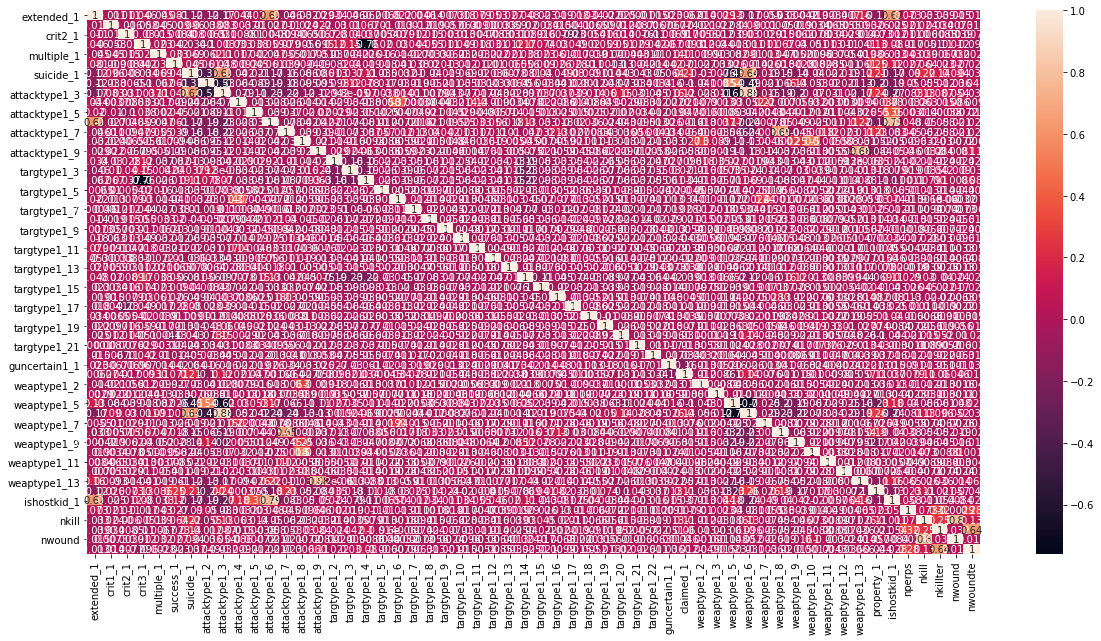

In [23]:
plt.figure(figsize = (20,10))
sns.heatmap(X.corr(), annot=True)

In [24]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)   
    return col_corr

## Dropping the highly correlated features

In [25]:
corr_features = correlation(X, 0.7)

corr_features

{'ishostkid_1', 'nwound', 'targtype1_4', 'weaptype1_6'}

In [26]:
X = X.drop(list(corr_features), axis=1)

## Dropping the features with high VIF

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif["variables"] =X.columns

vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif

,variables,VIF
0,extended_1,1.745268
1,crit1_1,29.084747
2,crit2_1,46.388996
3,crit3_1,14.635889
4,multiple_1,1.224448
5,success_1,8.960793
6,suicide_1,2.644835
7,attacktype1_2,5.264253
8,attacktype1_3,10.430105
9,attacktype1_4,1.382052


In [28]:
X = X.drop(['crit1_1','crit2_1','crit3_1','attacktype1_3'],axis=1)

<AxesSubplot:>

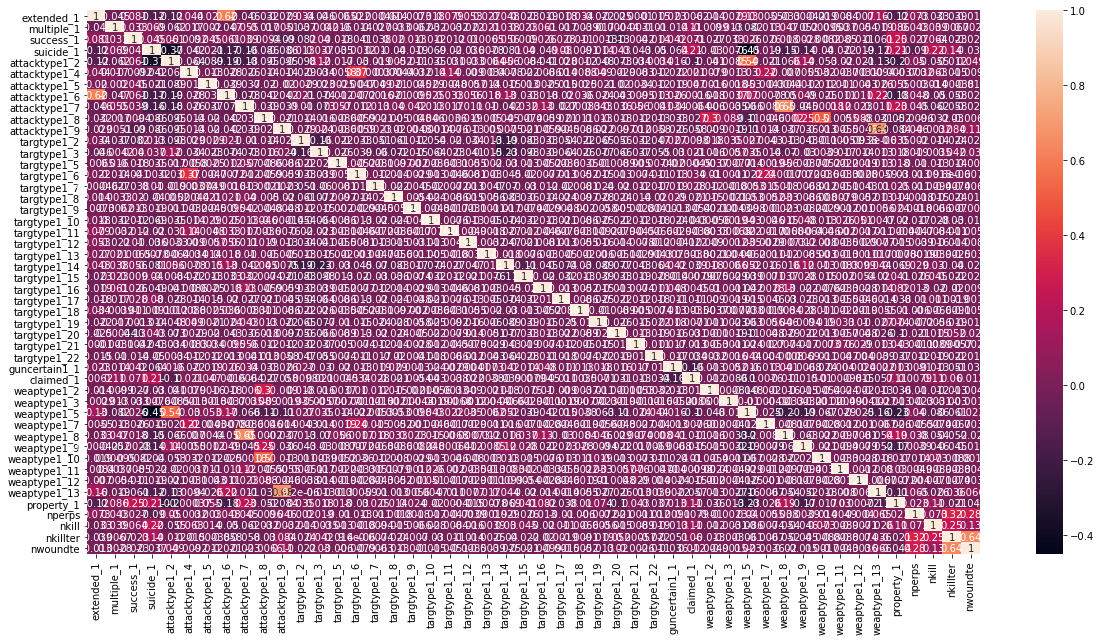

In [29]:
plt.figure(figsize = (20,10)) 
sns.heatmap(X.corr(), annot=True)

In [30]:
X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [31]:
# first logit model
m1 = sm.Logit(y_train.astype(float), X_train.astype(float))
res1 = m1.fit()
print(res1.summary())

         Current function value: 0.359546
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:              doubtterr   No. Observations:                 8346
Model:                          Logit   Df Residuals:                     8297
Method:                           MLE   Df Model:                           48
Date:                Thu, 12 Aug 2021   Pseudo R-squ.:                  0.2257
Time:                        18:30:34   Log-Likelihood:                -3000.8
converged:                      False   LL-Null:                       -3875.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0971      0.123      0.792      0.428      -0.143       0.337
extended_1       -0.1250      0.223     -0.561      0.57

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


## Dropping the features which are not significant

In [32]:
X = X.drop(['extended_1','success_1','attacktype1_2','attacktype1_4','attacktype1_5','attacktype1_8','targtype1_9',
           'targtype1_13','weaptype1_2','weaptype1_3','weaptype1_7','weaptype1_8','weaptype1_9','weaptype1_11','weaptype1_12','weaptype1_13','nperps','nkill','nwoundte'], axis=1)

In [33]:
# second logit model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

m2 = sm.Logit(y_train.astype(float), X_train.astype(float))
res2 = m2.fit()
print(res2.summary())

Optimization terminated successfully.
         Current function value: 0.362248
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              doubtterr   No. Observations:                 8346
Model:                          Logit   Df Residuals:                     8316
Method:                           MLE   Df Model:                           29
Date:                Thu, 12 Aug 2021   Pseudo R-squ.:                  0.2199
Time:                        18:30:38   Log-Likelihood:                -3023.3
converged:                       True   LL-Null:                       -3875.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2600      0.081      3.205      0.001       0.101       0.419
multiple_1       -0.

In [34]:
features = X[['multiple_1', 'suicide_1', 'attacktype1_6', 'attacktype1_7',
       'attacktype1_9', 'targtype1_2', 'targtype1_3', 'targtype1_5',
       'targtype1_6', 'targtype1_7', 'targtype1_8', 'targtype1_10',
       'targtype1_11', 'targtype1_12', 'targtype1_14', 'targtype1_15',
       'targtype1_16', 'targtype1_17', 'targtype1_18', 'targtype1_19',
       'targtype1_20', 'targtype1_21', 'targtype1_22', 'guncertain1_1',
       'claimed_1', 'weaptype1_5', 'weaptype1_10', 'property_1', 'nkillter']]

## Making predictions on test data

In [35]:
y_pred = res2.predict(X_test)

In [36]:
y_pred_df = pd.DataFrame(y_pred)

In [37]:
y_pred_1 = y_pred_df.reset_index()

In [38]:
y_pred_1.head()

,index,0
0,3899,0.119029
1,1974,0.020916
2,6056,0.273954
3,17326,0.215741
4,17985,0.104237


In [39]:
y_test_df = pd.DataFrame(y_test)

In [40]:
y_test_df['RowID'] = y_test.index

In [41]:
y_pred_1 = y_pred_1.drop('index',axis=1)
y_test_df = y_test_df.reset_index()
y_test_df = y_test_df.drop('index',axis=1)

In [42]:
y_pred_final = pd.concat([y_test_df, y_pred_1], axis=1)

In [43]:
y_pred_final= y_pred_final.rename(columns={0:'Terr_Prob'})

In [44]:
y_pred_final.head()

,doubtterr,RowID,Terr_Prob
0,0,3899,0.119029
1,0,1974,0.020916
2,0,6056,0.273954
3,1,17326,0.215741
4,0,17985,0.104237


In [45]:
y_pred_final = y_pred_final[['RowID','doubtterr','Terr_Prob']]
y_pred_final.head()

,RowID,doubtterr,Terr_Prob
0,3899,0,0.119029
1,1974,0,0.020916
2,6056,0,0.273954
3,17326,1,0.215741
4,17985,0,0.104237


## Making predictions taking 0.5 as cutoff probability

In [46]:
def pred(x):
    return 1 if x>0.5 else 0

y_pred_final['predicted'] = y_pred_final.apply(lambda x:pred(x['Terr_Prob']),axis=1)

In [47]:
y_pred_final.head()

,RowID,doubtterr,Terr_Prob,predicted
0,3899,0,0.119029,0
1,1974,0,0.020916,0
2,6056,0,0.273954,0
3,17326,1,0.215741,0
4,17985,0,0.104237,0


In [48]:
y_pred_final['doubtterr'] = np.dtype('int64').type(y_pred_final['doubtterr'])

In [49]:
confusion_matrix(y_pred_final['doubtterr'], y_pred_final['predicted'])

array([[2818,  108],
       [ 451,  200]], dtype=int64)

In [50]:
accuracy_score(y_pred_final['doubtterr'], y_pred_final['predicted'])

0.8437237908862175

In [51]:
print(classification_report(y_pred_final['doubtterr'], y_pred_final['predicted']))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      2926
           1       0.65      0.31      0.42       651

    accuracy                           0.84      3577
   macro avg       0.76      0.64      0.66      3577
weighted avg       0.82      0.84      0.82      3577



## ROC Curve for 0.5 as cutoff probability

In [52]:
from sklearn import metrics
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

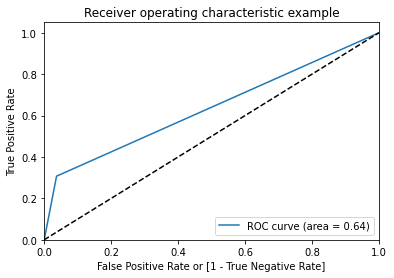

(array([0.        , 0.03691046, 1.        ]),
 array([0.        , 0.30721966, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [53]:
draw_roc(y_pred_final['doubtterr'], y_pred_final['predicted'])

In [54]:
numbers = [float(x)/10 for x in range(10)]
def myfunc(x,i):
    return 1 if x>i else 0

for i in numbers:
    y_pred_final[i]= y_pred_final.apply(lambda x:myfunc(x['Terr_Prob'],i),axis=1)

    

y_pred_final.head()

,RowID,doubtterr,Terr_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,3899,0,0.119029,0,1,1,0,0,0,0,0,0,0,0
1,1974,0,0.020916,0,1,0,0,0,0,0,0,0,0,0
2,6056,0,0.273954,0,1,1,1,0,0,0,0,0,0,0
3,17326,1,0.215741,0,1,1,1,0,0,0,0,0,0,0
4,17985,0,0.104237,0,1,1,0,0,0,0,0,0,0,0


## Trying to find the optimal cutoff probability

In [55]:
cutoff_df = pd.DataFrame(columns=['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]


for i in num:
    y_pred_final['res'] = y_pred_final.apply(lambda x:myfunc(x['Terr_Prob'],i),axis=1)
    cm1 = confusion_matrix(y_pred_final['doubtterr'], y_pred_final['res'])
    
    total1= sum(sum(cm1))
    
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    
    cutoff_df.loc[i] = [i,accuracy,sensi,speci]
    y_pred_final.drop('res',axis=1,inplace=True)


cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.181996,0.000000,1.000000
0.1,0.1,0.625664,0.584416,0.811060
0.2,0.2,0.775231,0.794258,0.689708
0.3,0.3,0.818843,0.869105,0.592934
0.4,0.4,0.840928,0.918660,0.491551
0.5,0.5,0.843724,0.963090,0.307220
0.6,0.6,0.837294,0.987013,0.164363
0.7,0.7,0.822477,0.998633,0.030722
0.8,0.8,0.819122,0.999658,0.007680
0.9,0.9,0.818004,1.000000,0.000000


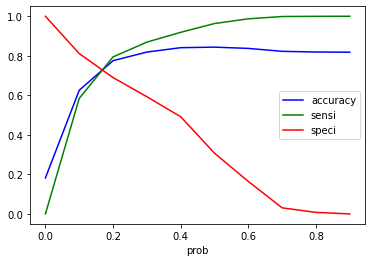

In [56]:
plt.plot(cutoff_df['prob'],cutoff_df['accuracy'],color='b',label='accuracy' )
plt.plot(cutoff_df['prob'],cutoff_df['sensi'],color='g',label='sensi' )
plt.plot(cutoff_df['prob'],cutoff_df['speci'],color='r',label='speci')
plt.xlabel('prob')
plt.legend()
plt.show()

In [57]:
y_pred_final['final_predicted'] = y_pred_final.apply(lambda x:myfunc(x['Terr_Prob'],0.2),axis=1)

In [58]:
y_pred_final.head()

,RowID,doubtterr,Terr_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,3899,0,0.119029,0,1,1,0,0,0,0,0,0,0,0,0
1,1974,0,0.020916,0,1,0,0,0,0,0,0,0,0,0,0
2,6056,0,0.273954,0,1,1,1,0,0,0,0,0,0,0,1
3,17326,1,0.215741,0,1,1,1,0,0,0,0,0,0,0,1
4,17985,0,0.104237,0,1,1,0,0,0,0,0,0,0,0,0


In [59]:
accuracy_score(y_pred_final['doubtterr'], y_pred_final['final_predicted'])

0.775230640201286

In [60]:
confusion_matrix(y_pred_final['doubtterr'], y_pred_final['final_predicted'])

array([[2324,  602],
       [ 202,  449]], dtype=int64)

In [61]:
print(classification_report(y_pred_final['doubtterr'], y_pred_final['final_predicted']))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85      2926
           1       0.43      0.69      0.53       651

    accuracy                           0.78      3577
   macro avg       0.67      0.74      0.69      3577
weighted avg       0.83      0.78      0.79      3577



## ROC Curve for 0.2 as cutoff probability

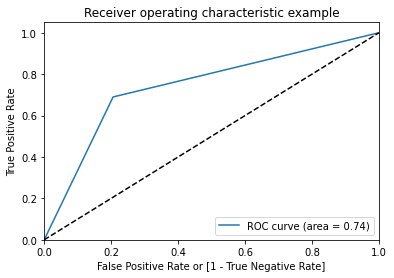

(array([0.        , 0.20574163, 1.        ]),
 array([0.        , 0.68970814, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [62]:
draw_roc(y_pred_final['doubtterr'], y_pred_final['final_predicted'])

## After handling imbalanced data using Synthetic Minority Oversampling Technique (SMOTE)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.3, random_state=100)
smo = SMOTE(random_state=12, sampling_strategy = 1.0)
x_train_r, y_train_r = smo.fit_sample(X_train.astype(float), y_train.astype(float))

In [64]:
log_reg = LogisticRegression(C = 0.0001,random_state=21)
log_reg.fit(x_train_r, y_train_r)

LogisticRegression(C=0.0001, random_state=21)

In [65]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        print("Classification Report: \n {}\n".format(classification_report(y_train.astype(float), clf.predict(X_train.astype(float)))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train.astype(float), clf.predict(X_train.astype(float)))))
        
    else:
        print("Classification Report: \n {}\n".format(classification_report(y_test.astype(float), clf.predict(X_test.astype(float)))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test.astype(float), clf.predict(X_test.astype(float)))))

In [66]:
print_score(log_reg, x_train_r, y_train_r, X_test, y_test, train=False)

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.89      0.67      0.76      2926
         1.0       0.29      0.61      0.39       651

    accuracy                           0.66      3577
   macro avg       0.59      0.64      0.58      3577
weighted avg       0.78      0.66      0.69      3577


Confusion Matrix: 
 [[1952  974]
 [ 253  398]]



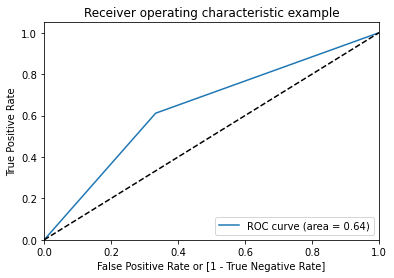

(array([0.        , 0.33287765, 1.        ]),
 array([0.        , 0.61136713, 1.        ]),
 array([2., 1., 0.]))

In [67]:
draw_roc(y_test.astype(float), log_reg.predict(X_test.astype(float)))